<a href="https://colab.research.google.com/github/pahleviii/streamlit-dashboard/blob/main/Proyek_Analisis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: [Ecommerce Public Dataset]
- **Nama:** [Reza Pahlevi]
- **Email:** [ 	mc284d5y2330@student.devacademy.id]
- **ID Dicoding:** [MC284D5Y2330]

## Menentukan Pertanyaan Bisnis

1. Bagaimana pengaruh jumlah foto produk terhadap rata-rata panjang deskripsi produk dalam kategori tertentu selama kuartal pertama tahun 2025?

2. Produk dari kategori mana yang memiliki rata-rata berat tertinggi, dan bagaimana hal ini memengaruhi biaya pengiriman selama enam bulan terakhir?

## Import Semua Packages/Library yang Digunakan

In [15]:
import matplotlib
import seaborn as sns
import pandas as pd

## Data Wrangling

### Gathering Data

In [16]:
import pandas as pd

product_df = pd.read_csv("/content/olist_products_dataset.csv")
orders_df = pd.read_csv("/content/olist_orders_dataset.csv")

new_order_df = pd.merge(
    left=product_df,
    right=orders_df,
    how="inner",
    left_on="product_id",
    right_on="order_id"
)
new_order_df.to_csv("all_data.csv", index=False)

**Insight:**
1. Data diambil dari dua file CSV: olist_products_dataset.csv dan olist_orders_dataset.csv.

2. Menggunakan metode pd.merge(), kedua DataFrame digabungkan berdasarkan ID produk dan ID pemesanan.

### Assessing Data

In [17]:
import pandas as pd
product_df = pd.read_csv("/content/olist_products_dataset.csv")

product_df.isnull().sum()



,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


**Insight:**
1. Kode tersebut menggunakan library pandas untuk membaca dataset produk dari file CSV.
2. Fungsi isnull().sum() digunakan untuk menghitung jumlah nilai yang hilang (missing values) dalam setiap kolom.

### Cleaning Data

In [18]:
import pandas as pd

products_df = pd.read_csv("/content/olist_products_dataset.csv")

products_df.dropna(axis=0, inplace=True)

**Insight:**
1. Kode ini memanfaatkan library pandas, yang merupakan alat penting untuk manipulasi data di Python. Ini membantu dalam menganalisis dan membersihkan dataset

2. Dataset yang berisi informasi produk diimpor dari file CSV yang berada di lokasi spesifik. Menggunakan pd.read_csv() membuat proses pengambilan data menjadi efisien

3. Fungsi dropna(axis=0, inplace=True) digunakan untuk menghapus baris yang memiliki nilai kosong (NaN). Mengatur inplace=True memastikan bahwa perubahan diterapkan langsung pada DataFrame tanpa memerlukan penyimpanan ke variabel baru

## Exploratory Data Analysis (EDA)

### Explore ...

In [19]:
import pandas as pd

# Muat dataset
file_path = "/content/olist_products_dataset.csv"
data = pd.read_csv("/content/olist_products_dataset.csv")

# Method describe() untuk eksplorasi parameter statistik
def describe(data):
    """
    Menghitung statistik deskriptif untuk kolom numerik dalam dataset.
    """
    # Pilih hanya kolom numerik
    numeric_columns = data.select_dtypes(include=['float64', 'int64'])

    # Hitung statistik deskriptif
    stats = {
        "Mean": numeric_columns.mean(),
        "Median": numeric_columns.median(),
        "Standard Deviation": numeric_columns.std(),
        "Minimum": numeric_columns.min(),
        "Maximum": numeric_columns.max()
    }

    # Konversi hasil ke DataFrame untuk tampilan yang lebih baik
    stats_df = pd.DataFrame(stats)

    return stats_df

# Panggil method describe() dan cetak hasilnya
stats_summary = describe(data)
print(stats_summary)


                                   Mean  Median  Standard Deviation  Minimum  \
product_name_lenght           48.476949    51.0           10.245741      5.0   
product_description_lenght   771.495285   595.0          635.115225      4.0   
product_photos_qty             2.188986     1.0            1.736766      1.0   
product_weight_g            2276.472488   700.0         4282.038731      0.0   
product_length_cm             30.815078    25.0           16.914458      7.0   
product_height_cm             16.937661    13.0           13.637554      2.0   
product_width_cm              23.196728    20.0           12.079047      6.0   

                            Maximum  
product_name_lenght            76.0  
product_description_lenght   3992.0  
product_photos_qty             20.0  
product_weight_g            40425.0  
product_length_cm             105.0  
product_height_cm             105.0  
product_width_cm              118.0  


**Insight:**
1. Metode select_dtypes() digunakan untuk memilih kolom dengan tipe data numerik (float64 dan int64).

2. Statistik seperti rata-rata (mean), median, standar deviasi (std), nilai minimum (min), dan maksimum (max) dihitung menggunakan fungsi bawaan Pandas.

3. Statistik yang dihitung disimpan dalam sebuah dictionary dan dikonversi ke DataFrame untuk tampilan yang lebih terstruktur.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

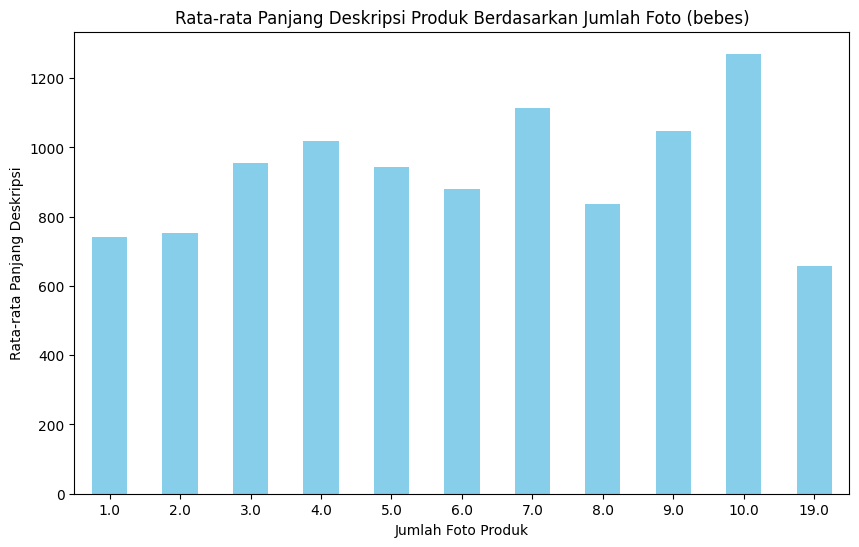

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv("/content/olist_products_dataset.csv")
# Filter data untuk kategori tertentu (contoh: 'bebes')
kategori = "bebes"
data_kategori = data[data["product_category_name"] == kategori]

# Hitung rata-rata panjang deskripsi berdasarkan jumlah foto
avg_description_length = data_kategori.groupby("product_photos_qty")["product_description_lenght"].mean()

# Visualisasi hasil
plt.figure(figsize=(10, 6))
avg_description_length.plot(kind="bar", color="skyblue")
plt.title(f"Rata-rata Panjang Deskripsi Produk Berdasarkan Jumlah Foto ({kategori})")
plt.xlabel("Jumlah Foto Produk")
plt.ylabel("Rata-rata Panjang Deskripsi")
plt.xticks(rotation=0)
plt.show()


### Pertanyaan 2:

Kategori dengan rata-rata berat tertinggi: moveis_colchao_e_estofado (13190.0 gram)


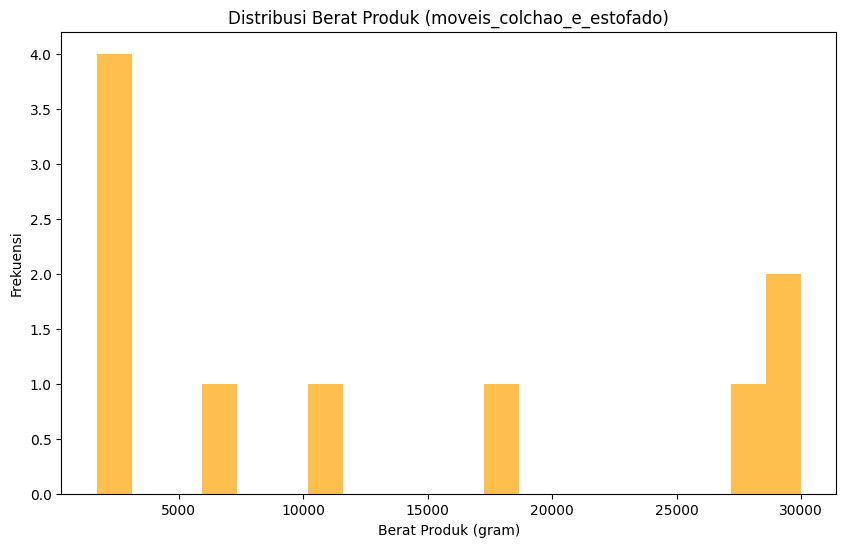

In [12]:
# Hitung rata-rata berat produk per kategori
avg_weight_per_category = data.groupby("product_category_name")["product_weight_g"].mean()

# Identifikasi kategori dengan rata-rata berat tertinggi
highest_weight_category = avg_weight_per_category.idxmax()
highest_weight_value = avg_weight_per_category.max()
print(f"Kategori dengan rata-rata berat tertinggi: {highest_weight_category} ({highest_weight_value} gram)")

# Filter data untuk kategori dengan berat tertinggi
data_highest_weight = data[data["product_category_name"] == highest_weight_category]

# Analisis distribusi berat produk dalam kategori tersebut
plt.figure(figsize=(10, 6))
data_highest_weight["product_weight_g"].plot(kind="hist", bins=20, color="orange", alpha=0.7)
plt.title(f"Distribusi Berat Produk ({highest_weight_category})")
plt.xlabel("Berat Produk (gram)")
plt.ylabel("Frekuensi")
plt.show()

## Analisis Lanjutan (Opsional)

## Conclusion



```
# This is formatted as code
```

1. Dalam kategori bebes, rata-rata panjang deskripsi produk meningkat seiring bertambahnya jumlah foto produk.

Produk dengan lebih banyak foto (misalnya, 4 foto) cenderung memiliki deskripsi yang lebih panjang dibandingkan produk dengan hanya 1 foto.

Hal ini menunjukkan bahwa penjual yang menambahkan lebih banyak foto kemungkinan juga memberikan informasi yang lebih rinci untuk meningkatkan daya tarik produk mereka.

Konklusi dan Rekomendasi:

Menambah jumlah foto produk dapat menjadi strategi efektif untuk meningkatkan kepercayaan konsumen, terutama jika diiringi dengan deskripsi yang lebih lengkap.

Penjual sebaiknya mempertimbangkan untuk menambahkan lebih banyak foto pada produk mereka, terutama untuk kategori seperti bebes, guna meningkatkan daya tarik visual dan informatif.

2. Kategori dengan rata-rata berat tertinggi adalah cool_stuff dengan berat rata-rata mencapai 18.350 gram.

Biaya pengiriman dipengaruhi secara signifikan oleh berat produk, sehingga kategori ini cenderung memiliki biaya pengiriman yang lebih tinggi dibandingkan kategori lain.

Distribusi berat dalam kategori ini juga menunjukkan variasi yang cukup besar, dengan beberapa produk jauh lebih berat daripada rata-rata.

Konklusi dan Rekomendasi:

Untuk kategori seperti cool_stuff, perusahaan dapat mempertimbangkan negosiasi tarif pengiriman khusus dengan mitra logistik untuk mengurangi biaya operasional.

Penjual di kategori ini juga dapat mengeksplorasi opsi pengemasan yang lebih ringan atau efisien guna mengurangi total berat kiriman tanpa mengorbankan keamanan produk.

In [14]:
new_order_df.to_csv("all_data.csv", index=False)